# 머신러닝(딥러닝)입문

#Linear regression


#기존의 프로그램 방식

In [ ]:
def celsius_to_fahrenheit(x):
  return x * 1.8 + 32

In [ ]:
celsius_value = int(input('섭씨온도를 입력하시오.'))
print('화씨온도로', celsius_to_fahrenheit(celsius_value))

섭씨온도를 입력하시오.23
화씨온도로 73.4


### 머신러닝 방식

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data_C= np.array(range(0,100))
data_F=celsius_to_fahrenheit(data_C)
print(data_C)
print(data_F)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 32.   33.8  35.6  37.4  39.2  41.   42.8  44.6  46.4  48.2  50.   51.8
  53.6  55.4  57.2  59.   60.8  62.6  64.4  66.2  68.   69.8  71.6  73.4
  75.2  77.   78.8  80.6  82.4  84.2  86.   87.8  89.6  91.4  93.2  95.
  96.8  98.6 100.4 102.2 104.  105.8 107.6 109.4 111.2 113.  114.8 116.6
 118.4 120.2 122.  123.8 125.6 127.4 129.2 131.  132.8 134.6 136.4 138.2
 140.  141.8 143.6 145.4 147.2 149.  150.8 152.6 154.4 156.2 158.  159.8
 161.6 163.4 165.2 167.  168.8 170.6 172.4 174.2 176.  177.8 179.6 181.4
 183.2 185.  186.8 188.6 190.4 192.2 194.  195.8 197.6 199.4 201.2 203.
 204.8 206.6 208.4 210.2]


In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(1,)))
model.add(Dense(1))
model.compile(loss='mse',optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
scaled_data_C =data_C/100 # 이유: 발산을 막기 위해서, learning rate를 곱하기도 전에 너무 커져서 발산할까봐 비례적으로 줄이는 거야. 그래서 scale이 0에서 100정도 되니까 100으로 나눈거야.
scaled_data_F = data_F/100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [ ]:
print(model.predict([0.01]))

1/1 [==============================] - 0s 212ms/step
[[0.00641437]]


In [ ]:
model.save('before_learning.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
fit_hist=model.fit(scaled_data_C,scaled_data_F, epochs =1000) # 1000번 학습 시킴.

Epoch 1/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.9016
Epoch 2/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.8793
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8653
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8518
Epoch 5/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.8401
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8292
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8185
Epoch 8/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.8072
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.7966
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.7869
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7769
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7678
Epoch 13/1000
4/4 [==============================

In [ ]:
print(model.predict([0.01]))

1/1 [==============================] - 0s 36ms/step
[[0.33834097]]


In [ ]:
model.save('after_learing.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


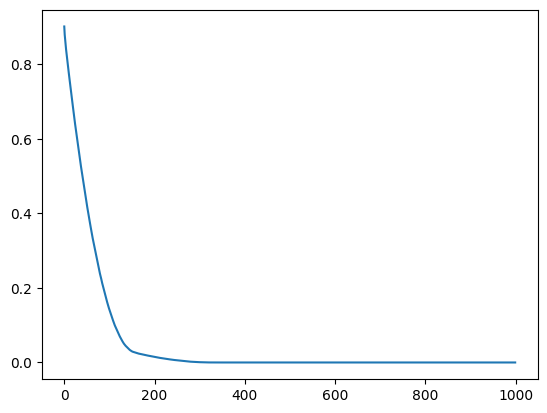

In [ ]:
plt.plot(fit_hist.history['loss'])
plt.show()

In [ ]:
noise = np.array(np.random.normal(0,0.05,100))
print(noise)

[ 0.01226829 -0.05113555  0.03844976  0.00801324  0.0415608   0.00773011
  0.04469614  0.12638976 -0.08201153  0.01442658  0.06396745  0.01580847
 -0.03306397  0.01301069 -0.04452532  0.01088217 -0.06208097 -0.02993116
  0.06146842 -0.03258607 -0.01785021  0.11477748  0.03275826 -0.0194214
 -0.00861202 -0.05783362 -0.0007382  -0.07036467  0.00880811 -0.14370675
 -0.02656132 -0.00157807 -0.04993108  0.12448681 -0.05266307 -0.04528419
  0.06311093  0.11918633 -0.02138439  0.11577541  0.01623699  0.00368342
  0.04328729 -0.00810451 -0.00225216  0.06453021  0.0764653  -0.04909539
  0.04958212 -0.09511811  0.0298844  -0.07467503 -0.00270985  0.00046976
 -0.01863309  0.07856213  0.01672786 -0.05992802  0.08557749 -0.05969159
 -0.02842909  0.01123113 -0.06547648 -0.02732816 -0.03584396  0.0056659
 -0.04923311 -0.01315683 -0.04879271  0.0123716  -0.02273762  0.11164953
  0.07704259  0.02329316 -0.04571057  0.01939883 -0.0513805  -0.00452371
 -0.01077102  0.00345829 -0.07000491  0.07419262  0.0

In [ ]:
noised_scaled_data_F = np.array([])
for data in scaled_data_F:
  noised_scaled_data_F = np.append(
  noised_scaled_data_F, np.random.normal(0,0.05,100)+data)
  print(noised_scaled_data_F)
  print(len(noised_scaled_data_F))

[0.32234086 0.31886783 0.28138598 0.31623308 0.27298204 0.40319075
 0.3837273  0.35575515 0.36352552 0.33737258 0.32378584 0.30886249
 0.31229667 0.32775408 0.38215135 0.2239175  0.32689652 0.33438644
 0.37757459 0.30289267 0.338126   0.35797678 0.2035609  0.33312839
 0.30524214 0.28001661 0.31380286 0.30530491 0.38692267 0.31764209
 0.32945921 0.34851361 0.298709   0.30030488 0.34706349 0.31459019
 0.41108148 0.30559334 0.29528695 0.34011072 0.37484347 0.41595418
 0.32368875 0.28688002 0.31877268 0.26020991 0.31300161 0.29824904
 0.35633723 0.24739055 0.33393664 0.40894354 0.31787502 0.28325667
 0.31839578 0.30228673 0.28529951 0.31372752 0.36618759 0.36665447
 0.31317056 0.29870619 0.29304894 0.34546469 0.27168898 0.30978941
 0.31343025 0.30064522 0.3392686  0.29896252 0.29734635 0.28487825
 0.3768058  0.32809244 0.21940016 0.28424247 0.22578068 0.34542245
 0.19593979 0.34022201 0.33526161 0.31865121 0.31669007 0.30246217
 0.31637788 0.44642071 0.29013946 0.36222481 0.1988995  0.2343

In [ ]:
import numpy as np

noised_scaled_data_C = []

for data in range(0, 100):
    for i in range(0, 100):
        noised_scaled_data_C.append(data)

noised_scaled_data_C = np.array(noised_scaled_data_C)
noised_scaled_data_C = noised_scaled_data_C / 100

print(noised_scaled_data_C)
print(len(noised_scaled_data_C))

[0.   0.   0.   ... 0.99 0.99 0.99]
10000


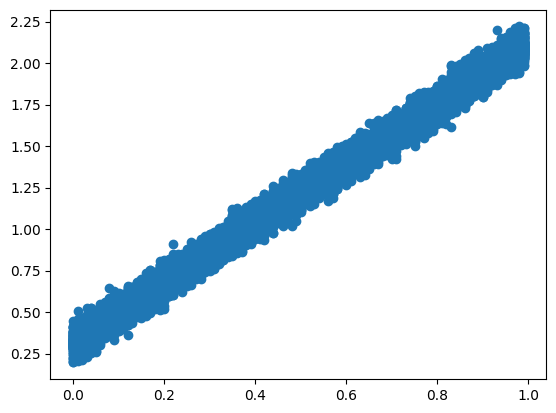

In [ ]:
plt.scatter(x=noised_scaled_data_C, y=noised_scaled_data_F)
plt.show()

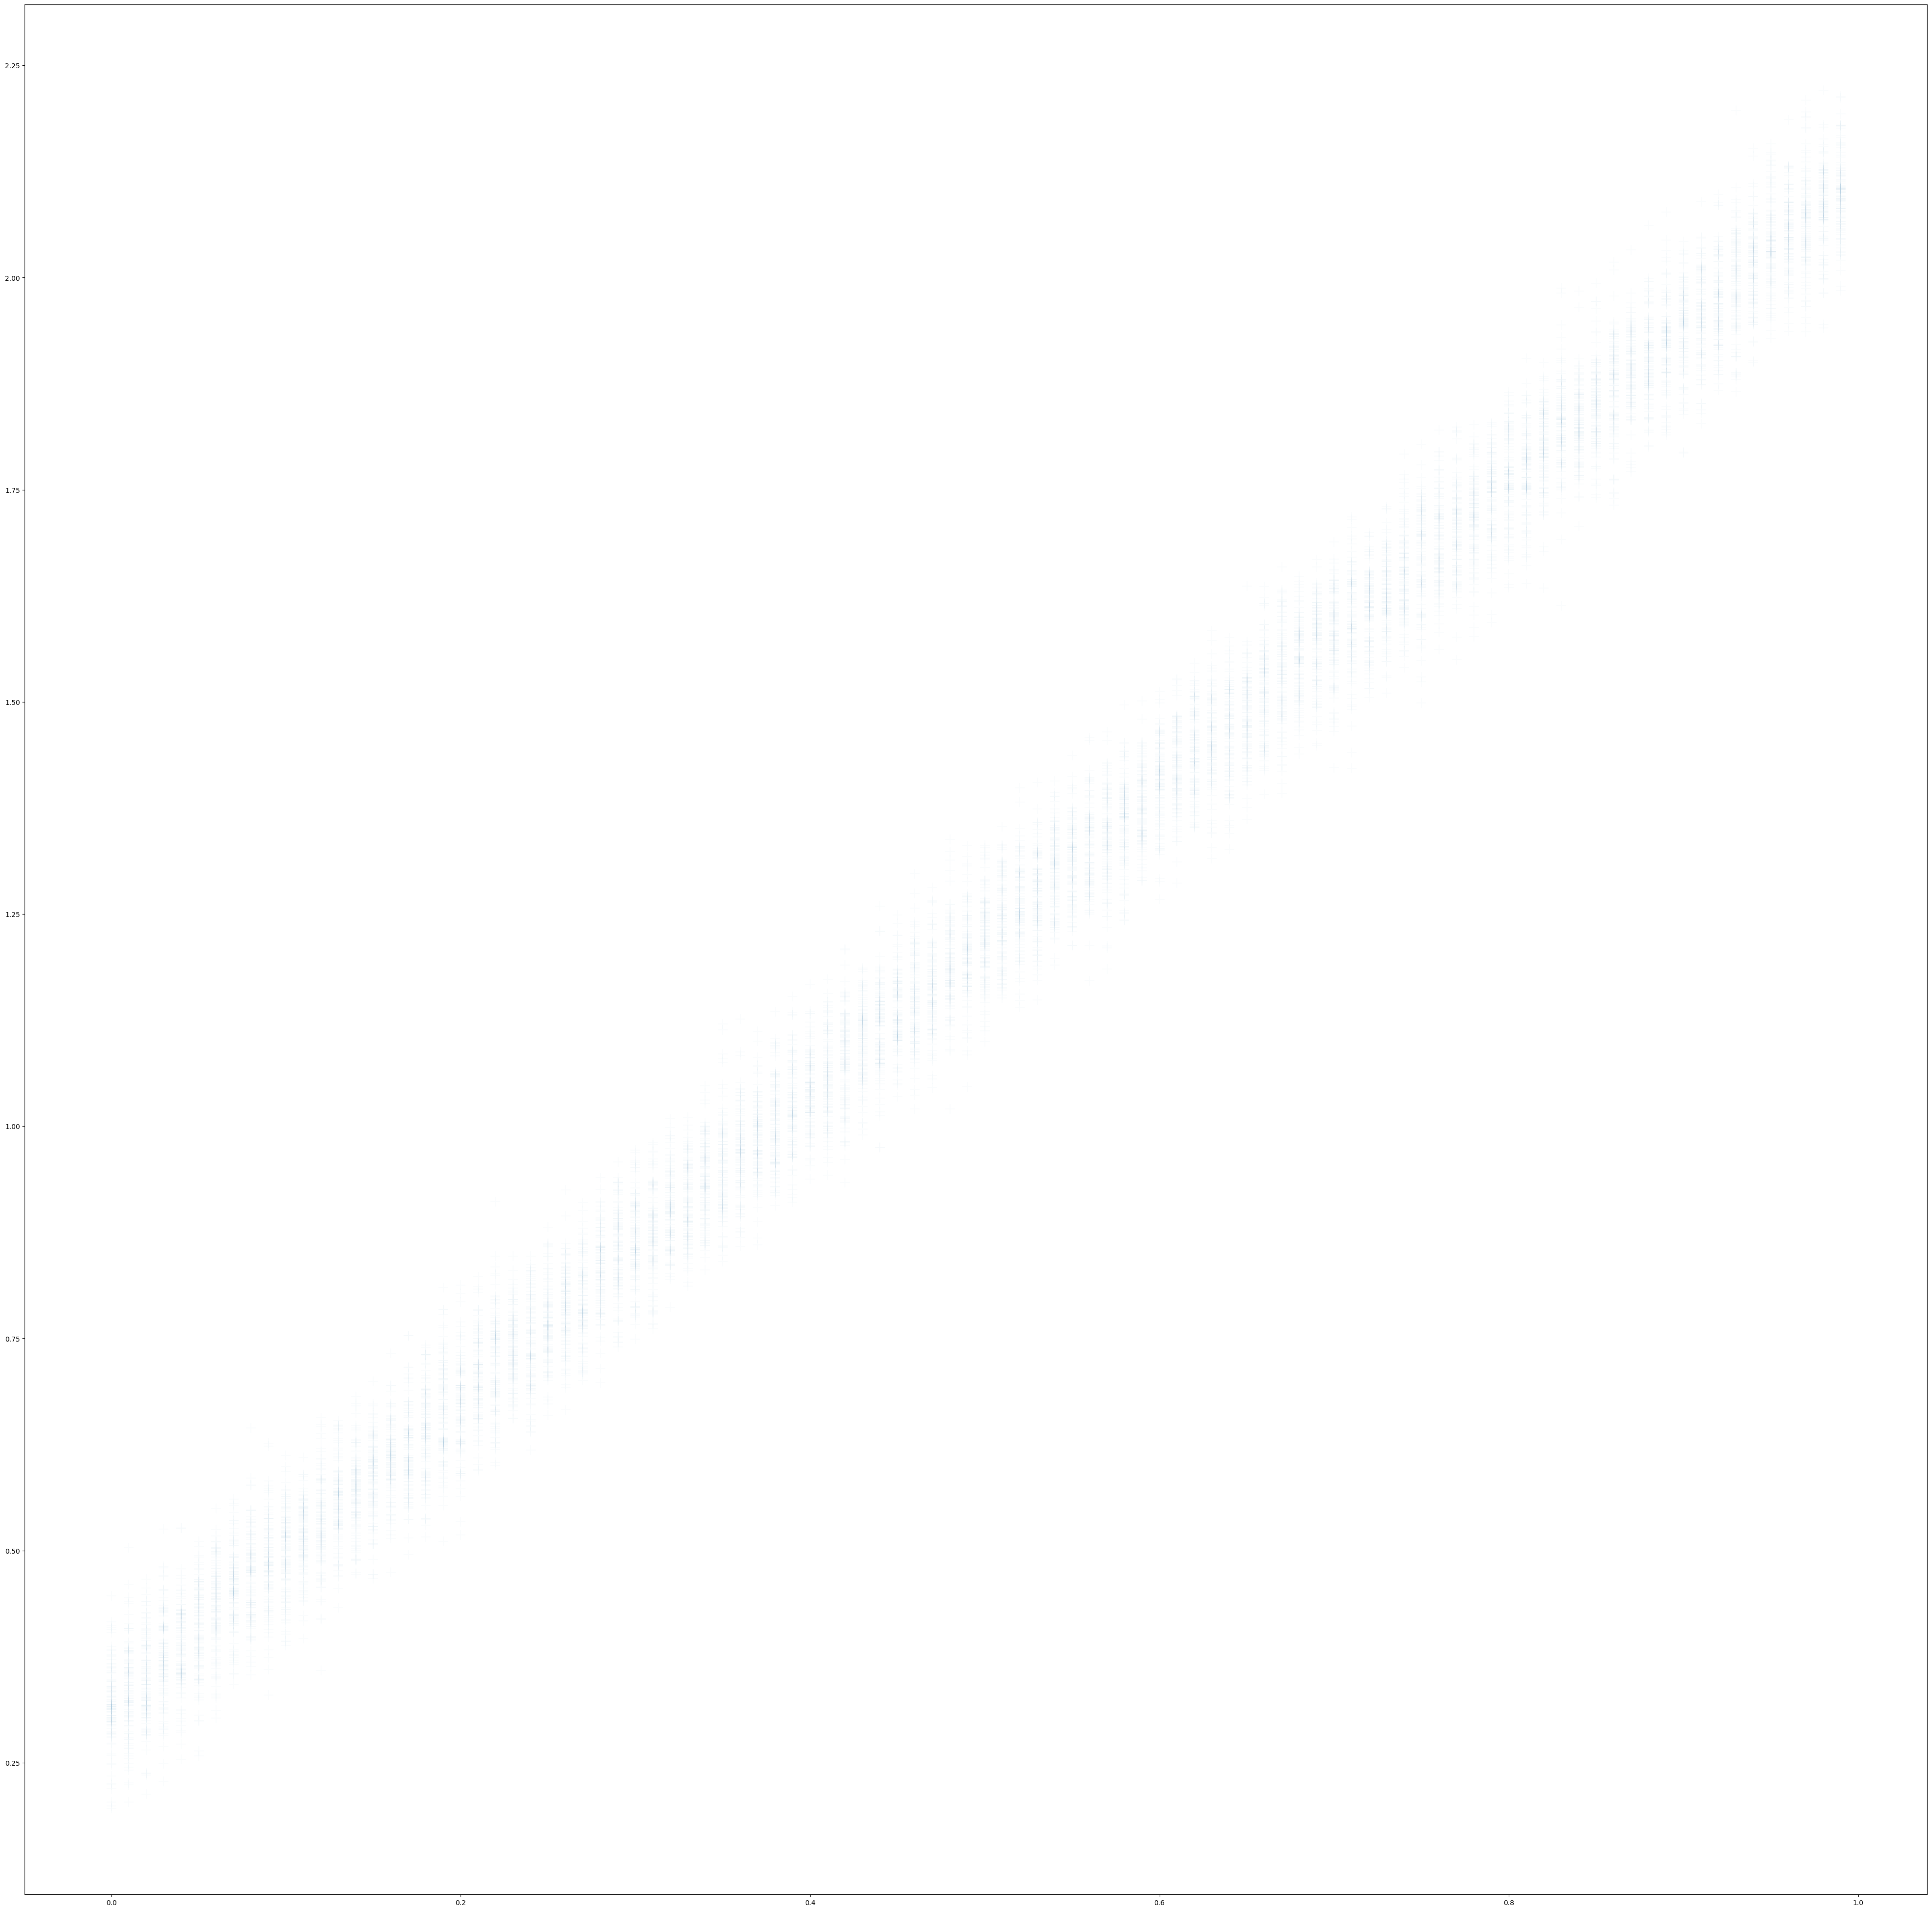

In [ ]:
fig=plt.figure(figsize=(50,50))
ax = fig.add_subplot(111)
ax.scatter(x=noised_scaled_data_C, y=noised_scaled_data_F,alpha=0.02,s=200,marker='+')
plt.show()

In [ ]:
model2 = Sequential()
model2.add(InputLayer(input_shape=(1,)))
model2.add(Dense(1))
model2.compile(loss='mse',optimizer='rmsprop')
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.predict([0.01]) # 회귀 모델의 예측 수행, 정답을 예측하기 위함. 오차가 가장 적게 해서
# 입력 값 0.01에 대한 예측을 얻기 위해 model2.predict 함수를 사용함

1/1 [==============================] - 0s 128ms/step


array([[0.01456355]], dtype=float32)

In [ ]:
fit_hist=model2.fit(scaled_data_C,scaled_data_F, epochs =20)

Epoch 1/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2456
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2343
Epoch 3/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2260
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2192
Epoch 5/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2135
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2079
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2025
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1973
Epoch 9/20
4/4 [==============================] - 0s 3ms/step - loss: 0.1921
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1868
Epoch 11/20
4/4 [==============================] - 0s 5ms/step - loss: 0.1817
Epoch 12/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1767
Epoch 13/20
4/4 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
model2.save('noised_after_learning.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(model2.predict([0.01]))

1/1 [==============================] - 0s 65ms/step
[[0.10202384]]


In [ ]:
celsius_value = int(input('섭씨 온도를 입력하세요'))
print('화씨 온도로', model2.predict([celsius_value / 100])*100)

섭씨 온도를 입력하세요32
1/1 [==============================] - 0s 38ms/step
화씨 온도로 [[57.98403]]


In [ ]:
celsius_value = int(input('섭씨 온도를 입력하세요'))
print('화씨 온도로', model2.predict([celsius_value / 100])*100)

섭씨 온도를 입력하세요23
1/1 [==============================] - 0s 35ms/step
화씨 온도로 [[44.11194]]


In [ ]:
celsius_value = int(input('섭씨 온도를 입력하세요.'))
print('화씨 온도로',np.around(model2.predict([celsius_value / 100])*100, 1),'입니다.')

섭씨 온도를 입력하세요.23
1/1 [==============================] - 0s 52ms/step
화씨 온도로 [[44.1]] 입니다.


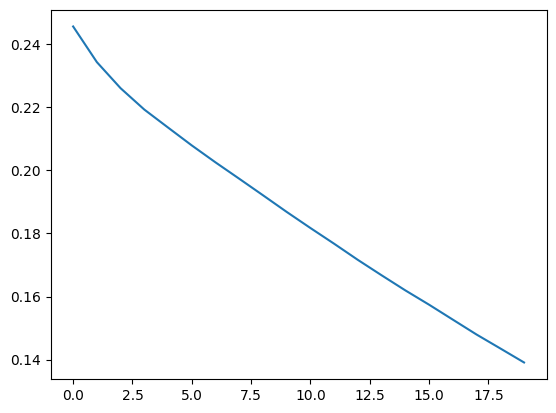

In [ ]:
plt.plot(fit_hist.history['loss'])
plt.show()